# Logistic Regression

When we talk about binary classification( 0 and 1 outputs) what comes to mind first is logistic regression.

However, in deep learning tutorial what to do with logistic regression there??

The answer is that logistic regression is actually a very simple neural network.

By the way neural network and deep learning are same thing. When we will come artificial neural network, I will explain detailed the terms like "deep".

In order to understand logistic regression (simple deep learning) lets first learn computation graph.


# Computation Graph


Choose our labels (classes) that are sign zero and sign one

Create and flatten train and test sets

Our final inputs(images) and outputs(labels or classes) looks like this:


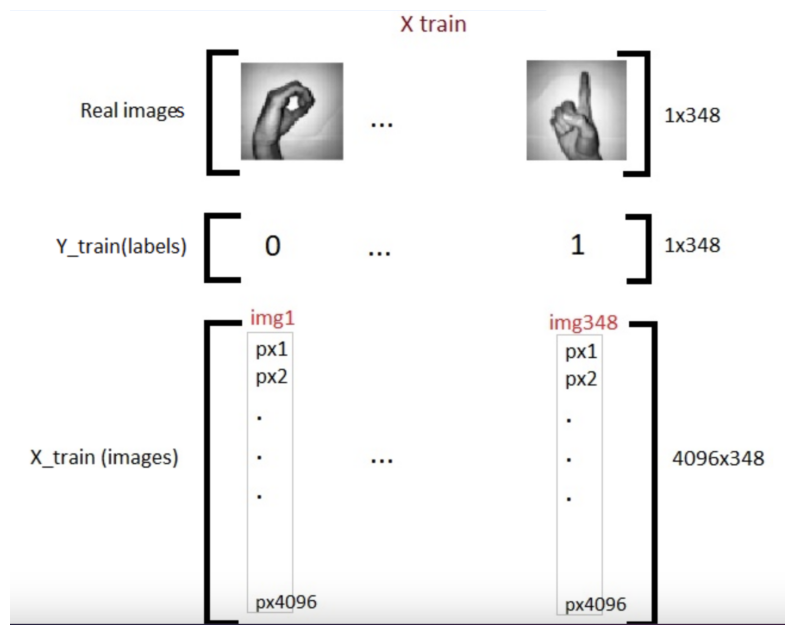

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Resmi yükleme
resim_yolu = 'Xtranin_Ytrain.png'  # Resmin dosya yolu
resim = mpimg.imread(resim_yolu)

# Resmi gösterme
plt.figure(figsize=(10,8)) 
plt.imshow(resim)
plt.axis('off')  # Eksenleri kapatma
plt.show()

Computation graphs are a nice way to think about mathematical expressions

Now lets look at computation graph of logistic regression

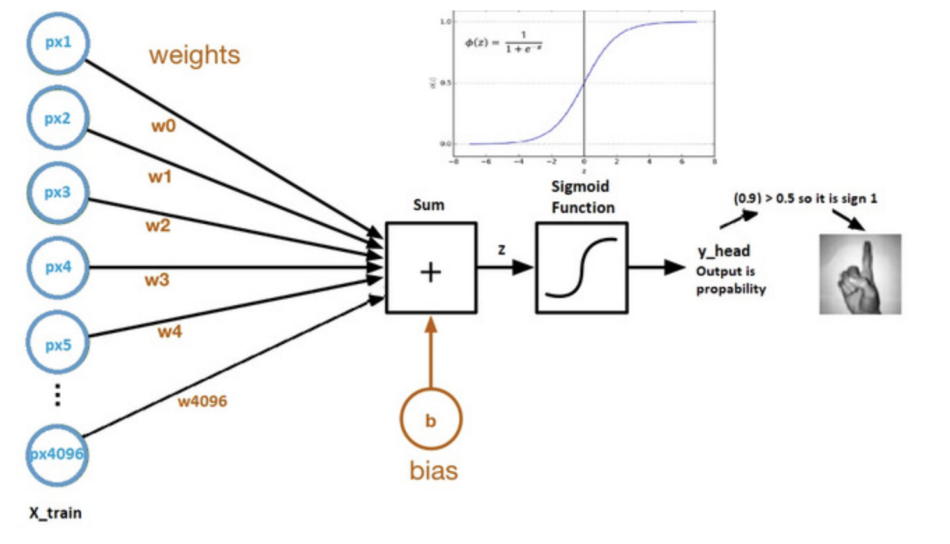

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Resmi yükleme
resim_yolu = 'LogisticRegression.png'  # Resmin dosya yolu
resim = mpimg.imread(resim_yolu)

# Resmi gösterme
plt.figure(figsize=(12, 10)) 
plt.imshow(resim)
plt.axis('off')  # Eksenleri kapatma
plt.show()

Parameters are weight and bias.

Weights: coefficients of each pixels
    
Bias: intercept
    
z = (w.t)x + b => z equals to (transpose of weights times input x) + bias

In an other saying => z = b + px1w1 + px2w2 + ... + px4096*w4096

y_head = sigmoid(z)

Sigmoid function makes z between zero and one so that is probability. You can see sigmoid function in computation graph.

Why we use sigmoid function?

It gives probabilistic result

It is derivative so we can use it in gradient descent algorithm (we will see as soon.)

Lets make example:
Lets say we find z = 4 and put z into sigmoid function. The result(y_head) is almost 0.9. It means that our classification result is 1 with 90% probability.
Now lets start with from beginning and examine each component of computation graph more detailed.

# Initializing parameters

As you know input is our images that has 4096 pixels(each image in x_train).

Each pixels have own weights.

The first step is multiplying each pixels with their own weights.

The question is that what is the initial value of weights?

There are some techniques that I will explain at artificial neural network but for this time initial weights are 0.01.

Okey, weights are 0.01 but what is the weight array shape? As you understand from computation graph of logistic regression, it is (4096,1)

Also initial bias is 0.

Lets write some code. In order to use at coming topics like artificial neural network (ANN), I make definition(method).

In [14]:
import numpy as np
import pandas as pd
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)  #dimension kadar 4096 a 1 lik (yani 4096 satır 1 sütundan oluşan) w yi 0.01 yap
    b = 0.0  #bias 0 yap
    return w, b

In [16]:
w,b = initialize_weights_and_bias(4096)
w

array([[0.01],
       [0.01],
       [0.01],
       ...,
       [0.01],
       [0.01],
       [0.01]])

# Forward Propagation (İleri Yayılım)

The all steps from pixels to cost is called forward propagation

z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)

Then we put z into sigmoid function that returns y_head(probability). When your mind is confused go and look at computation graph. Also equation of sigmoid function is in computation graph.

Then we calculate loss(error) function.

Cost function is summation of all loss(error).

Lets start with z and the write sigmoid definition(method) that takes z as input parameter and returns y_head(probability)

In [38]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))  #sigmoid formula
    return y_head

y_head = sigmoid(0)
y_head   #example

0.5

As we write sigmoid method and calculate y_head. Lets learn what is loss(error) function

Lets make example, I put one image as input then multiply it with their weights and add bias term so I find z. 

Then put z into sigmoid method so I find y_head. Up to this point we know what we did. Then e.g y_head became 0.9 that is bigger than 0.5 so our prediction is image is sign one image. 

Okey every thing looks like fine. But, is our prediction is correct and how do we check whether it is correct or not? 

The answer is with loss(error) function:

Mathematical expression of log loss(error) function is that:

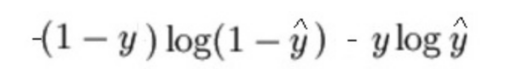

In [40]:
# Resmi yükleme
resim_yolu = 'Loss Function.png'  # Resmin dosya yolu
resim = mpimg.imread(resim_yolu)

# Resmi gösterme
plt.imshow(resim)
plt.axis('off')  # Eksenleri kapatma
plt.show()

Example: our real image is sign one and its label is 1 (y = 1), then we make prediction y_head = 1. When we put y and y_head into loss(error) equation the result is 0. We make correct prediction therefore our loss is 0. However, if we make wrong prediction like y_head = 0, loss(error) is infinity.

After that, the cost function is summation of loss function. 

Each image creates loss function. Cost function is summation of loss functions that is created by each input image.

# Train-Test Split

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data=pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)  #Gereksiz column
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
data["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [26]:
y=data.diagnosis.values
x=data.drop(["diagnosis"],axis=1)

Burada y kanserli ve kansersiz hücreler sınıflandırma kullanacağım bağımlı değişken

x ise bağımlı değişkeni etkileyen kalan diğer özellikler

In [27]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [28]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
#Normalization

x = (x - np.min(x))/(np.max(x)-np.min(x)).values
x

/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **pass

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [33]:
#train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [34]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (455, 30)
x_test:  (114, 30)
y_train:  (455,)
y_test:  (114,)


# Forward propagation (İleri Yayılım)

Yani yukarıdaki şekilden de pikseller belirlenir weight bulunur bias bulunur model eğitilir bu ileri yayılım 

Geri yayılım ise geri gelmek istediğimizde güncellenmesinde (w,b) yanlış tahmin olduğunda veya cost functoin hata oranımız fazla olduğunda

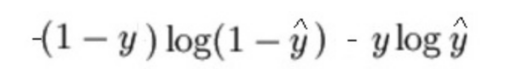

In [42]:
# Resmi yükleme
resim_yolu = 'Loss Function.png'  # Resmin dosya yolu
resim = mpimg.imread(resim_yolu)

# Resmi gösterme
plt.imshow(resim)
plt.axis('off')  # Eksenleri kapatma
plt.show()

In [41]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost

# Optimization Algorithm with Gradient Descent (Geri Yayılım)

Well, now we know what is our cost that is error.

Therefore, we need to decrease cost because as we know if cost is high it means that we make wrong prediction.

Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.

In order to decrease cost, we need to update weights and bias.

In other words, our model needs to learn the parameters weights and bias that minimize cost function. This technique is called gradient descent.

Lets make an example:

We have w = 5 and bias = 0 (so ignore bias for now). Then we make forward propagation and our cost function is 1.5.
It looks like this. (red lines)

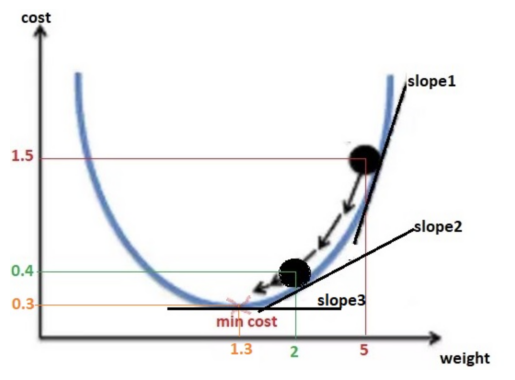

In [43]:
# Resmi yükleme
resim_yolu = 'Backward Propagation.png'  # Resmin dosya yolu
resim = mpimg.imread(resim_yolu)

# Resmi gösterme
plt.imshow(resim)
plt.axis('off')  # Eksenleri kapatma
plt.show()

As you can see from graph, we are not at minimum point of cost function. Therefore we need to go through minimum cost. Okey, lets update weight. ( the symbol := is updating)

w := w - step. The question is what is this step? Step is slope1. Okey, it looks remarkable. In order to find minimum point, we can use slope1. Then lets say slope1 = 3 and update our weight. w := w - slope1 => w = 2.

Now, our weight w is 2. As you remember, we need to find cost function with forward propagation again.

Lets say according to forward propagation with w = 2, cost function is 0.4. Hmm, we are at right way because our cost function is decrease. We have new value for cost function that is cost = 0.4. Is that enough? Actually I do not know lets try one more step.

Slope2 = 0.7 and w = 2. Lets update weight w : = w - step(slope2) => w = 1.3 that is new weight. So lets find new cost.

Make one more forward propagation with w = 1.3 and our cost = 0.3. Okey, our cost even decreased, it looks like fine but is it enough or do we need to make one more step? The answer is again I do not know, lets try.

Slope3 = 0.01 and w = 1.3. Updating weight w := w - step(slope3) => w = 1.29 ~ 1.3. So weight does not change because we find minimum point of cost function.

Everything looks like good but how we find slope? 

If you remember from high school or university, in order to find slope of function(cost function) at given point(at given weight) we take derivative of function at given point. 

Also you can ask that okey well we find slope but how it knows where it go. You can say that it can go more higher cost values instead of going minimum point. The asnwer is that slope(derivative) gives both step and direction of step. Therefore do not worry :)

Update equation is this. 

It says that there is a cost function(takes weight and bias). Take derivative of cost function according to weight and bias. Then multiply it with α learning rate. Then update weight. (In order to explain I ignore bias but these all steps will be applied for bias)

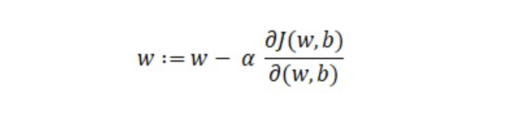

In [49]:
#Resmi yükleme
resim_yolu = 'Backward Türev.png'  # Resmin dosya yolu
resim = mpimg.imread(resim_yolu)

# Resmi gösterme
plt.imshow(resim)
plt.axis('off')  # Eksenleri kapatma
plt.show()

Now, I am sure you are asking what is learning rate that I mentioned never. It is very simple term that determines learning rate. Hovewer there is tradeoff between learning fast and never learning. For example you are at Paris(current cost) and want to go Madrid(minimum cost). If your speed(learning rate) is small, you can go Madrid very slowly and it takes too long time. On ther other hand, if your speed(learning rate) is big, you can go very fast but maybe you make crash and never go to Madrid. Therefore, we need to choose wisely our speed(learning rate).

Learning rate is also called hyperparameter that need to be chosen and tuned. I will explain it more detailed in artificial neural network with other hyperparameters. For now just say learning rate is 1 for our previous example.

In [50]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

# Implementing Update Parameters 

initializing parameters (implemented)

Finding cost with forward propagation and cost function (implemented)

Updating(learning) parameters (weight and bias). Now lets implement it.

In [66]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,num_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(num_iterations):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In order to predict we have parameters. Therefore, lets predict.

In prediction step we have x_test as a input and while using it, we make forward prediction.

In [67]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

In [68]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    

# Logistic Regression with Sklearn

In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [85]:
lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
print("test accuracy: {} ".format(lr.fit(x_train, y_train).score(x_test, y_test))) #score predict et daha sonra score ver
print("train accuracy: {} ".format(lr.fit(x_train, y_train).score(x_train, y_train)))  #score predict et daha sonra score ver

test accuracy: 0.9824561403508771 
train accuracy: 0.967032967032967 
